#### Implementation of Real-Time Signal Processing Algorithms
Mikołaj Zuziak
Variant 9

Each student is assigned a task consisting of two parts:
- Part A: Real-Time ECG Signal Processing — simulate and process ECG signal in real-time-like fashion.
- Part B: Kalman-Bucy Filtering — implement and simulate a Kalman-Bucy filter for a continuous stochastic system.

Students are expected to:
- Analyze and comment on system behavior and filter performance.
- Submit source code, plots, and a brief written interpretation.

#### Part A - Real-Time ECG Signal 
ECG sampling rate = 360 Hz, duration = 10 s, block = 180 samples.

In [2]:
import numpy as np
import matplotlib . pyplot as plt
import time
from scipy . signal import butter , lfilter

In [3]:
def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    # Basic ECG-like waveform (sum of sinusoids)
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate/60 * t) \
        + 0.2 * np.sin(2 * np.pi * 2 * heart_rate/60 * t) \
        + 0.1 * np.random.randn(len(t))  # Add noise
    return t, ecg

In [4]:
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

In [5]:
def simulate_real_time_processing(ecg_signal, fs, block_size=200):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs

    processed_signal = []
    t_axis = []

    print("Simulating real-time ECG filtering...")

    for i in range(num_blocks):
        block = ecg_signal[i*block_size:(i+1)*block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i*block_size, (i+1)*block_size)/fs)

        # Optional: plot dynamic update (comment out for performance)
        plt.clf()
        plt.plot(t_axis, processed_signal, label="Filtered ECG", color='blue')
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.title("Real-Time ECG Simulation")
        plt.grid(True)
        plt.pause(0.01)  # Live update

        time.sleep(delay)  # Simulate real-time delay

    plt.show()

Simulating real-time ECG filtering...


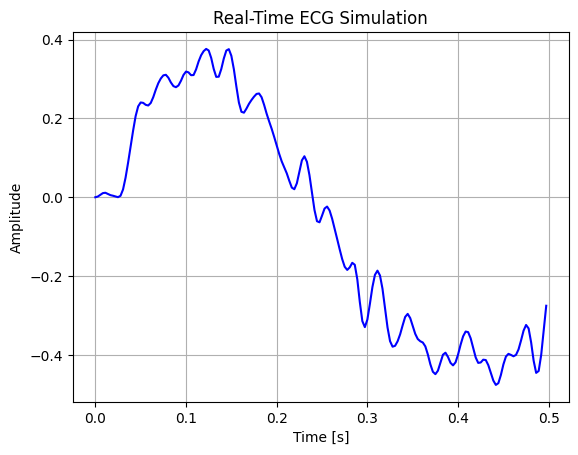

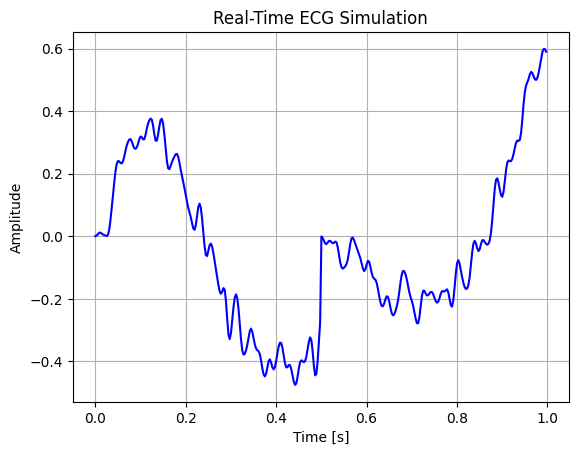

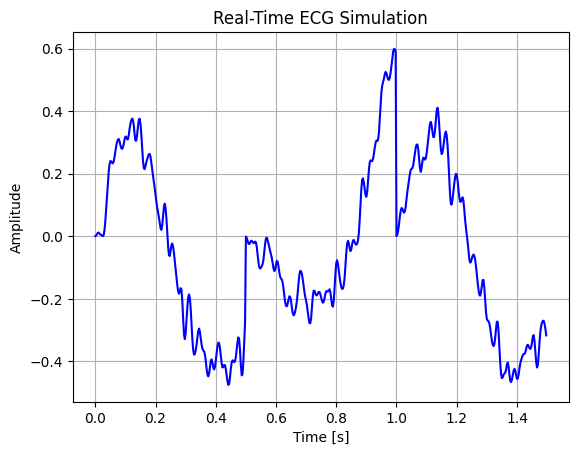

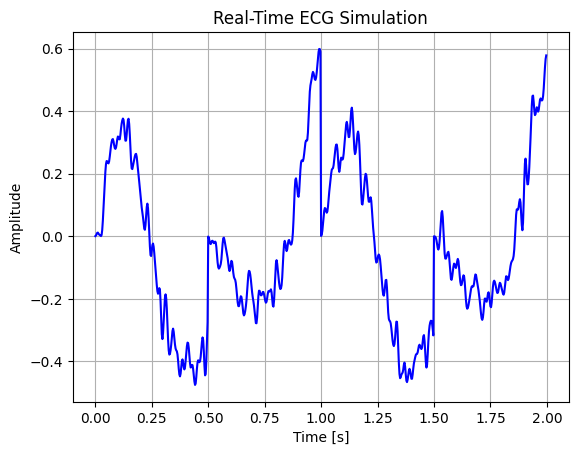

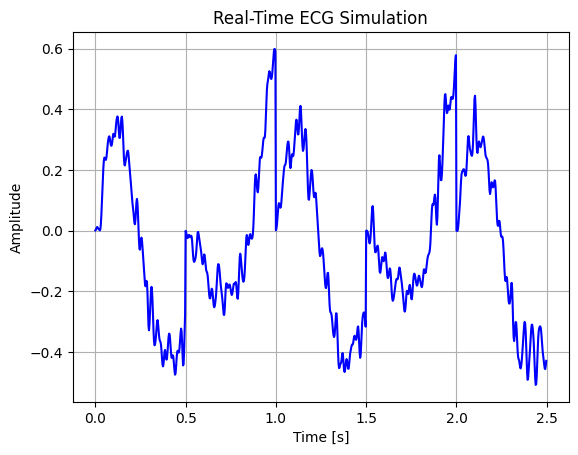

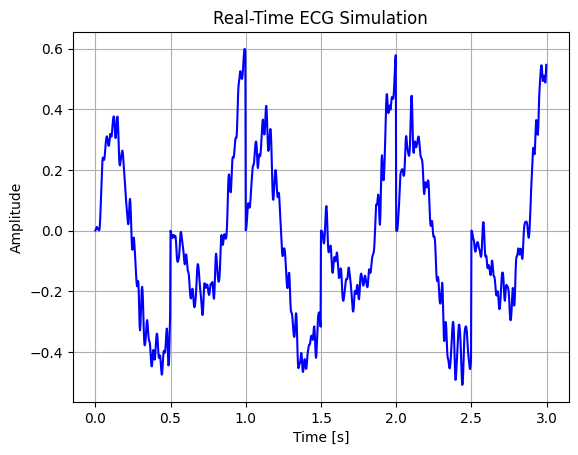

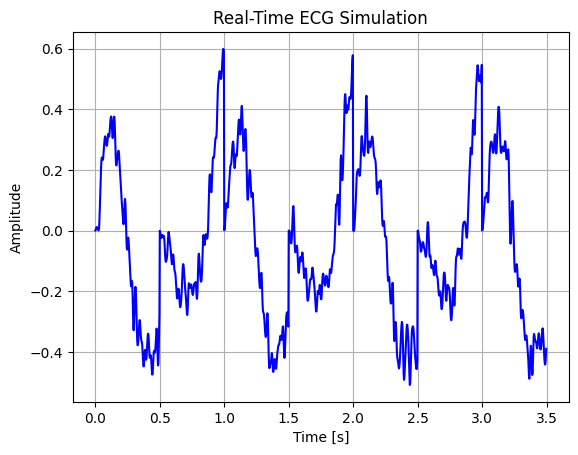

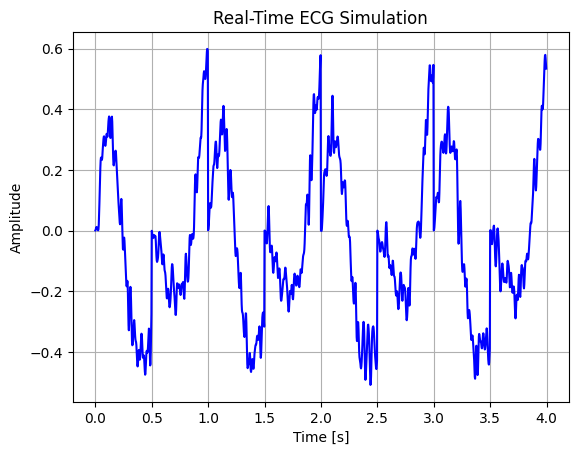

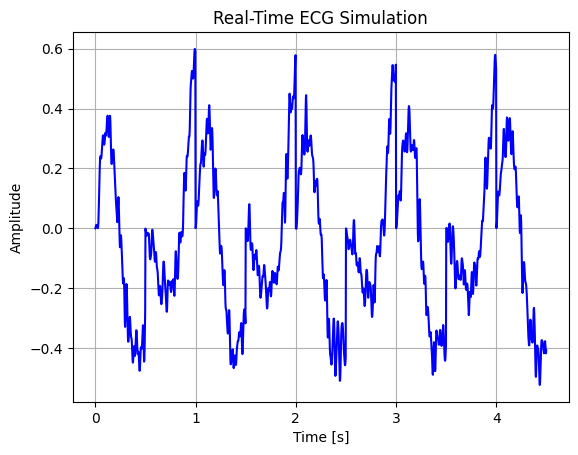

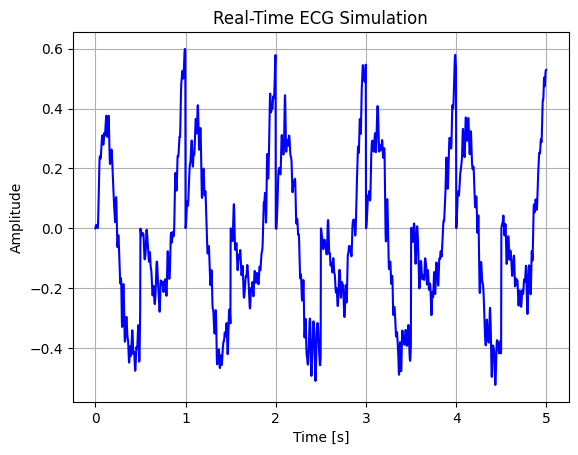

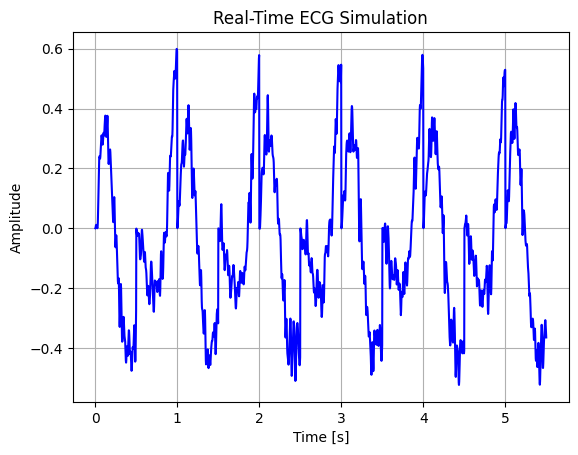

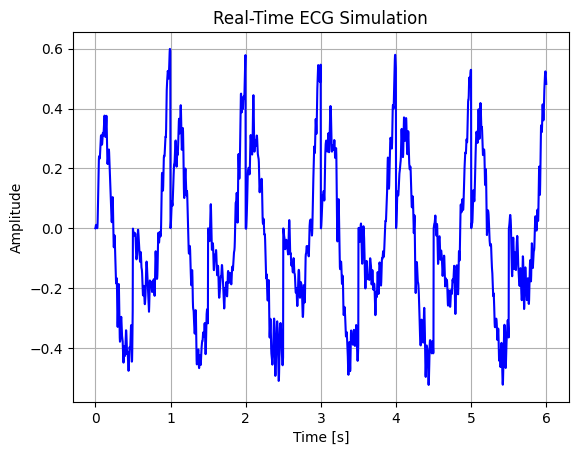

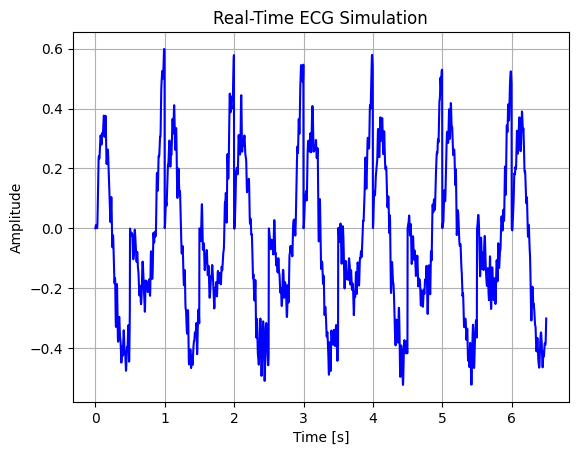

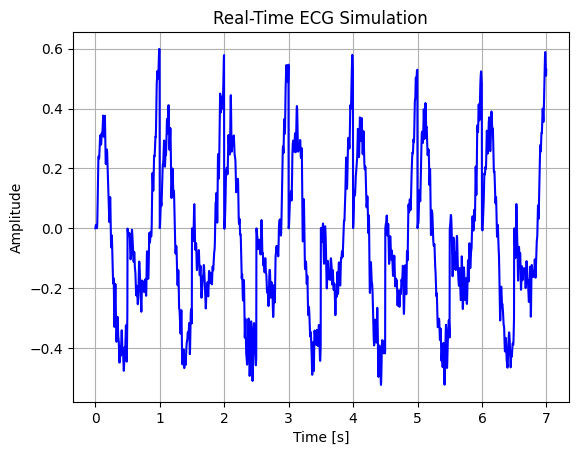

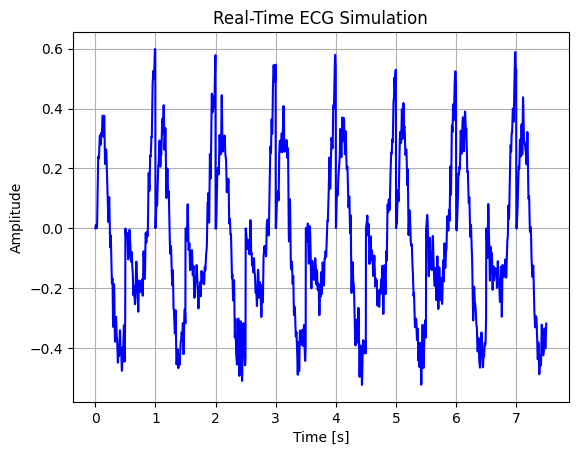

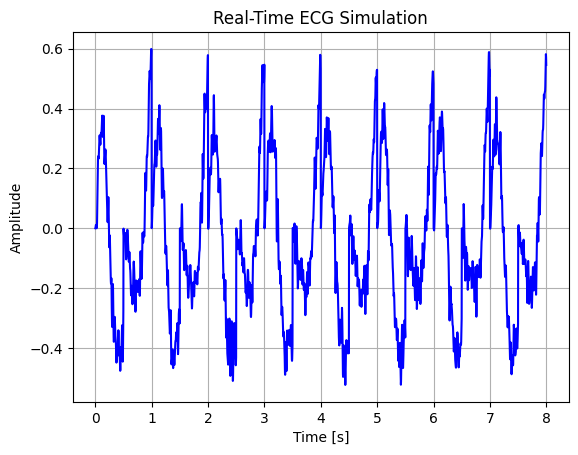

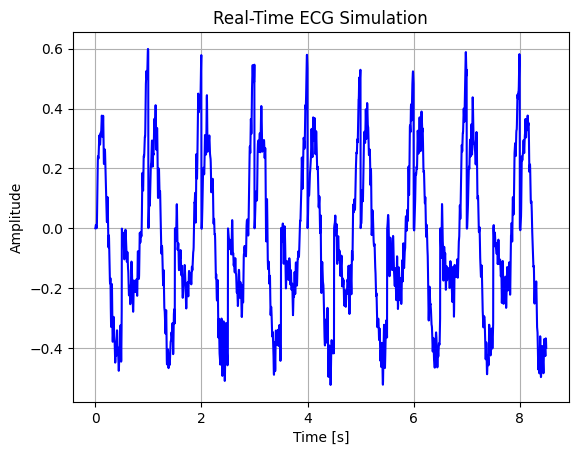

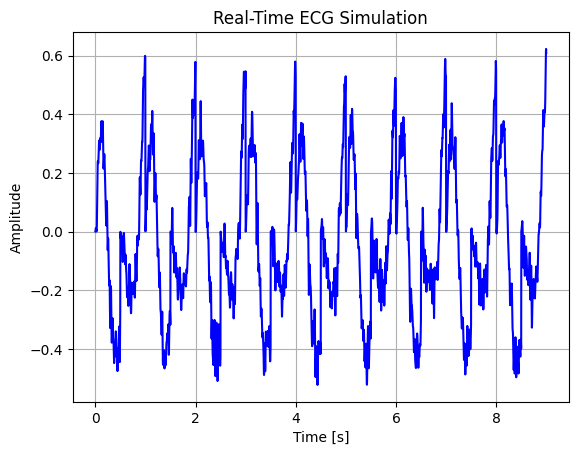

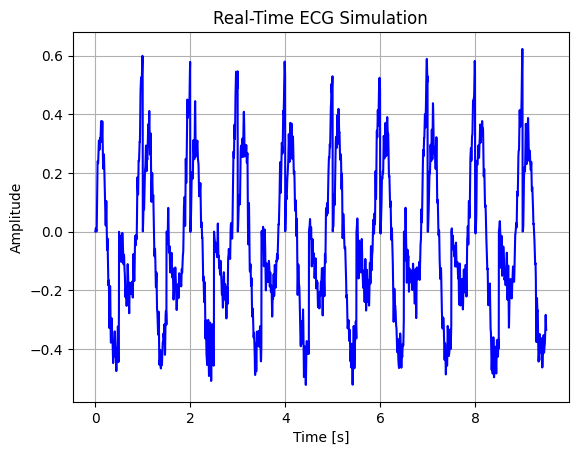

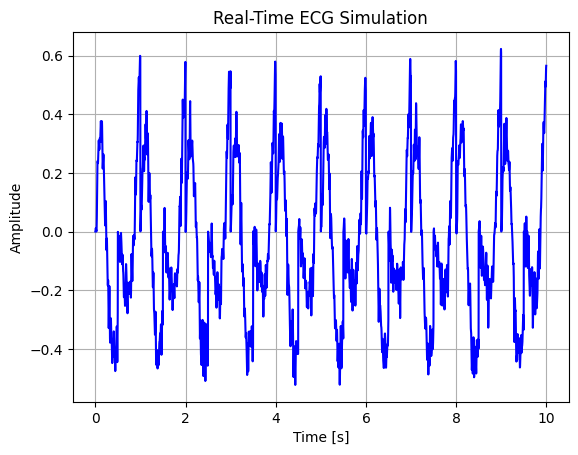

In [9]:
fs = 360           # Sampling frequency (Hz) From task variant
duration = 10      # Signal duration (s) From task variant
block_size = 180  # Block size for processing From task variant
t, ecg = synthetic_ecg(fs, duration)

simulate_real_time_processing(ecg, fs, block_size)

- The synthetic ECG signal incorporates realistic elements such as harmonic content and random noise.
- The bandpass filter effectively removes low-frequency drift and high-frequency noise, isolating the primary ECG frequency components (0.5–40 Hz).
- The real-time-like simulation using block-based filtering demonstrates how signal delay and dynamic visualization can be achieved in practice.
- The filter's effectiveness is visually evident through the smoother, denoised ECG trace shown in the live plot.

-------
#### Part B - Kalman-Bucy Filtering
Kalman-Bucy:
- $ \dot{x} = −1.5x + w $
- $ y = x + v $
- $ Q = 0.9 $
- $ R = 0.6 $

In [7]:
import numpy as np
import matplotlib.pyplot as plt

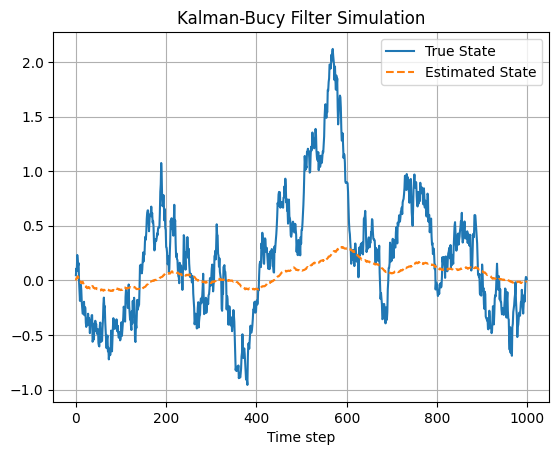

In [24]:
np.random.seed(42)  # For reproducibility

dt = 0.01
T = 10
N = int(T / dt)

A = -1.5 #From task variant
C = 1
Q = 0.9 #From task variant
R = 0.6 #From task variant

P = 1.0
x_true = 0.0
x_hat = 0.0

x_history = []
xhat_history = []
P_history = []

for k in range(N):
    # True system
    w = np.random.normal(0, np.sqrt(Q * dt))
    x_true += dt * (A * x_true) + w
    v = np.random.normal(0, np.sqrt(R))
    y = C * x_true + v

    # Kalman-Bucy update
    K = P * C / R
    x_hat += dt * (A * x_hat + K * (y - C * x_hat))
    P += dt * (2*A*P + Q - K * C * P)

    # Store
    x_history.append(x_true)
    xhat_history.append(x_hat)
    P_history.append(P)

# Plot results
plt.plot(x_history, label="True State")
plt.plot(xhat_history, label="Estimated State", linestyle="--")
plt.legend()
plt.title("Kalman-Bucy Filter Simulation")
plt.xlabel("Time step")
plt.grid()
plt.show()

- The continuous-time state estimation model includes process noise (Q = 0.9) and measurement noise (R = 0.6), to simulate real-world systems.
- Over time, the Kalman-Bucy filter successfully tracks the true system state with improving accuracy, as indicated by the convergence of the estimated state to the true state.
- The time evolution of estimation error and uncertainty confirms proper filter tuning and stability for the given system parameters.

-----
1. The ECG processing demonstrates practical biomedical signal processing techniques with a focus on real-time implementation. The block-based approach provides a good compromise between processing latency and computational efficiency.
2. The Kalman-Bucy filter demonstrates the power of optimal estimation for continuous stochastic systems. The filter successfully balances between trusting the model and trusting the measurements based on their respective uncertainties.
3. The negative system coefficient (-1.5) creates stability, making the filtering task achievable despite significant noise. The high process-to-measurement noise ratio makes the filter quite responsive to new measurements.